### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. 

#### The following describes the dataset columns:

 CRIM - per capita crime rate by town

 ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS - proportion of non-retail business acres per town.

 CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

 NOX - nitric oxides concentration (parts per 10 million)

 RM - average number of rooms per dwelling

 AGE - proportion of owner-occupied units built prior to 1940

 DIS - weighted distances to five Boston employment centres

 RAD - index of accessibility to radial highways

 TAX - full-value property-tax rate per  $10,000

 PTRATIO - pupil-teacher ratio by town

 B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT - % lower status of the population

 MEDV - Median value of owner-occupied homes in $1000's


### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('Housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Data preprocessing

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

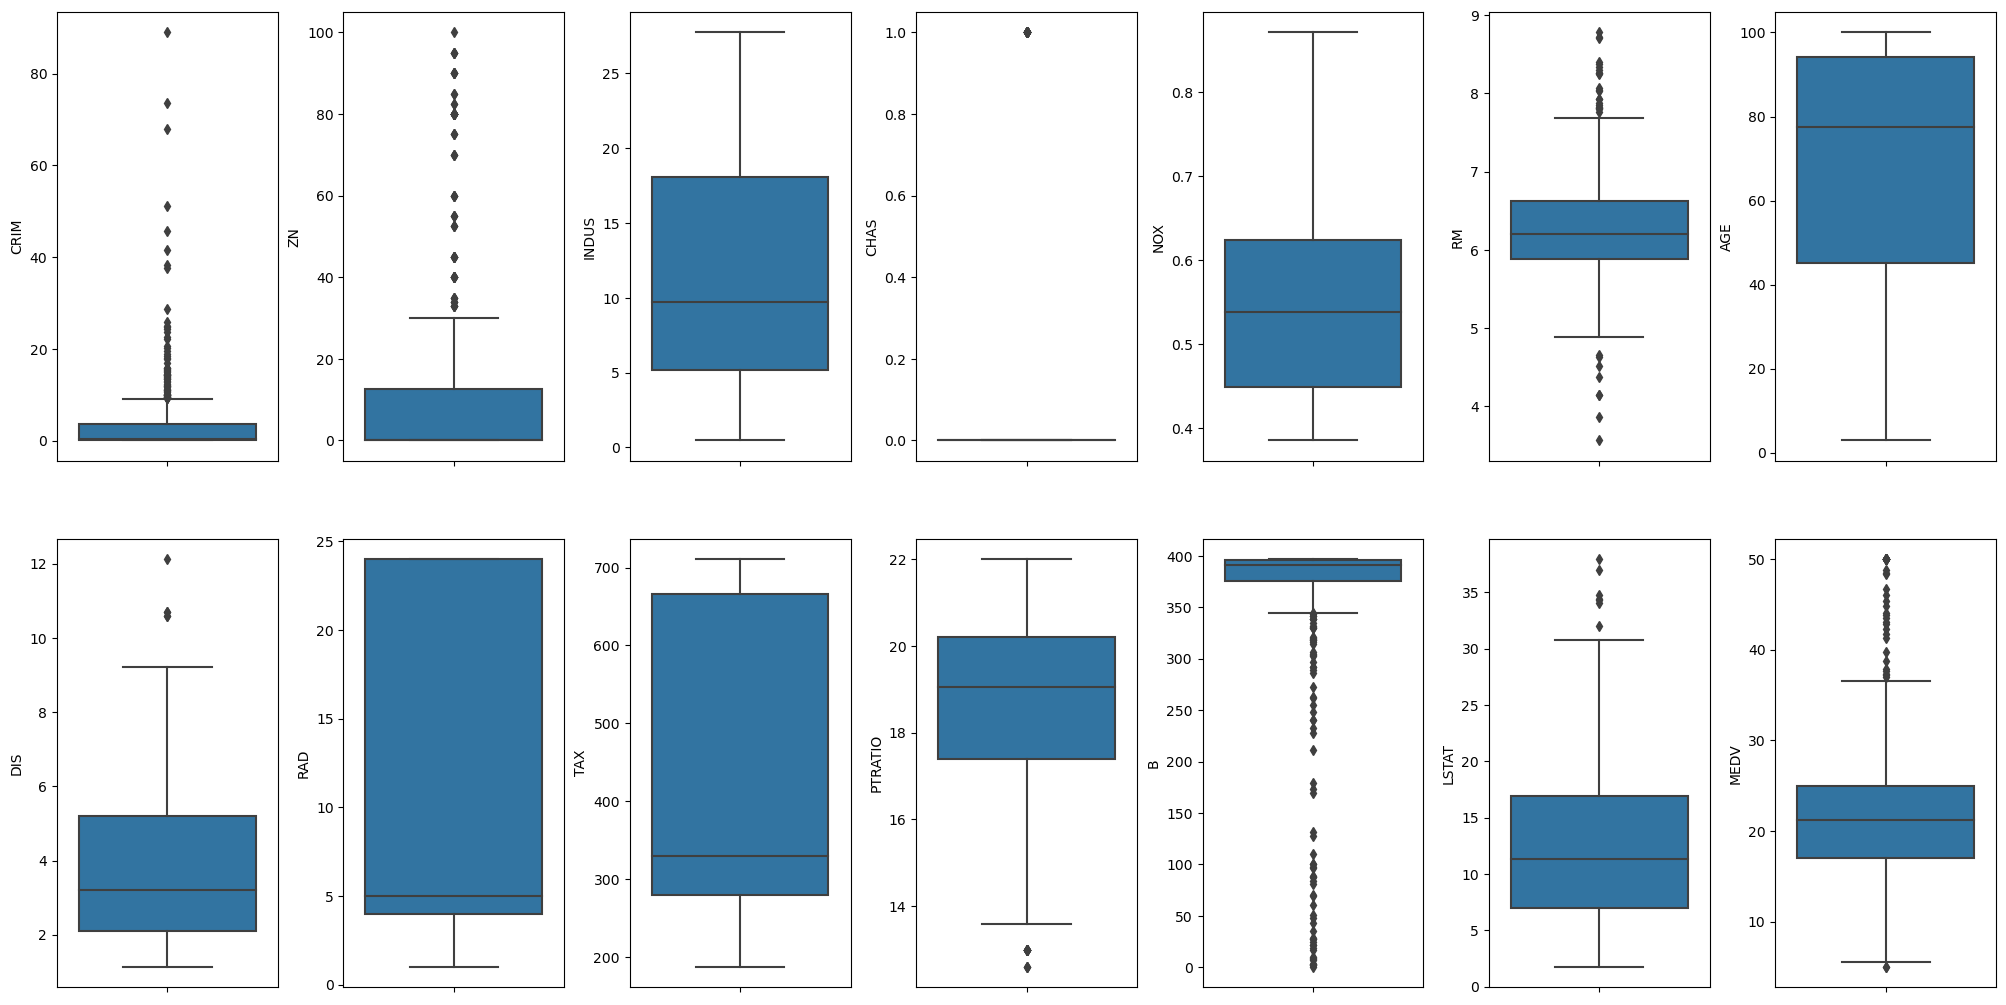

In [7]:
# Let us create box plots for all columns to identify the outliers.

# create box plots

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [8]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


##  Visualization of the Data

### Let’s first plot the distribution of the target variable MEDV

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


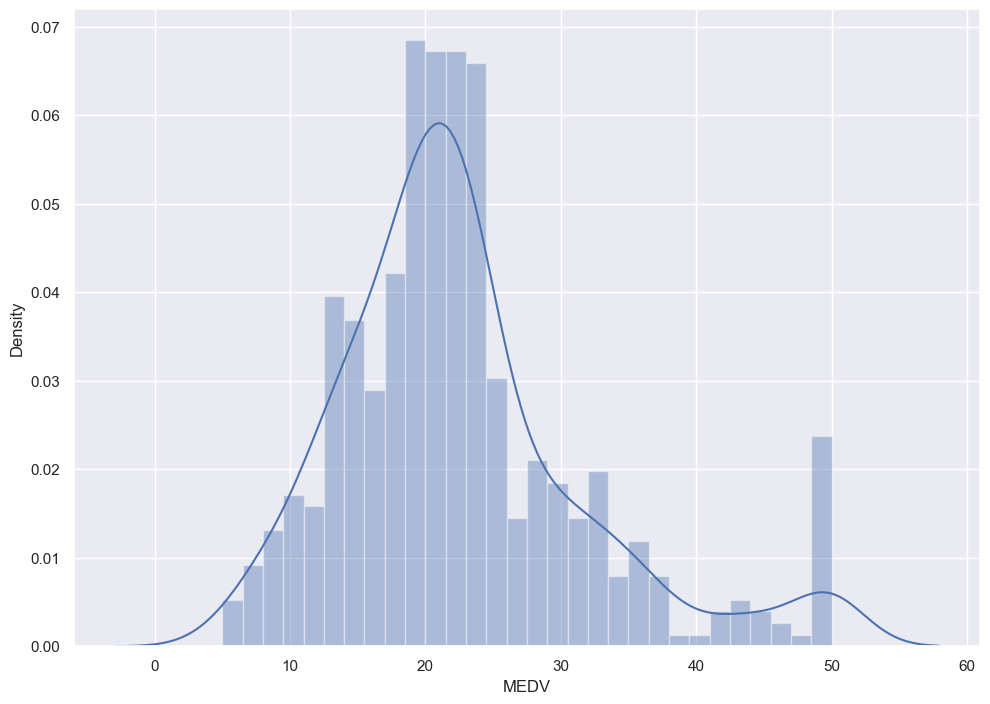

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

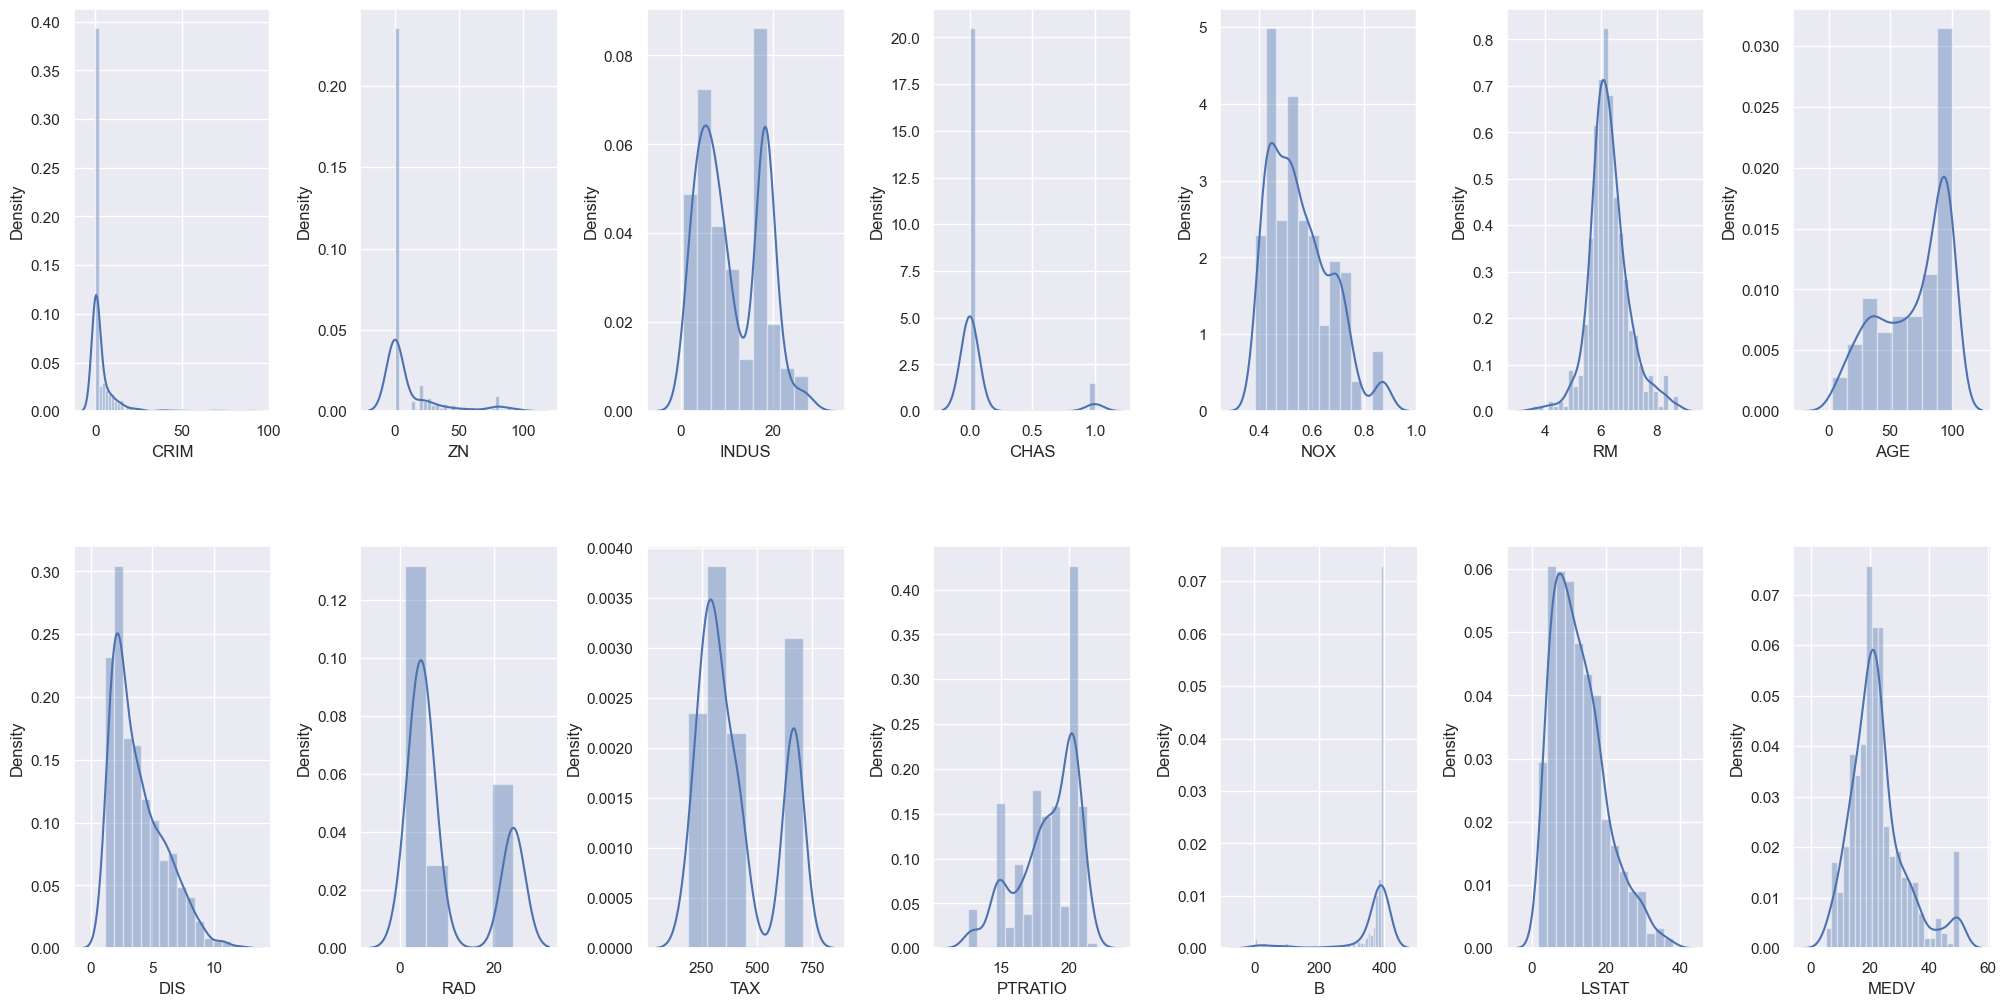

In [10]:

#Let us create distribution plots for all columns.

#  Let's see how these features plus MEDV distributions looks like

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<AxesSubplot:>

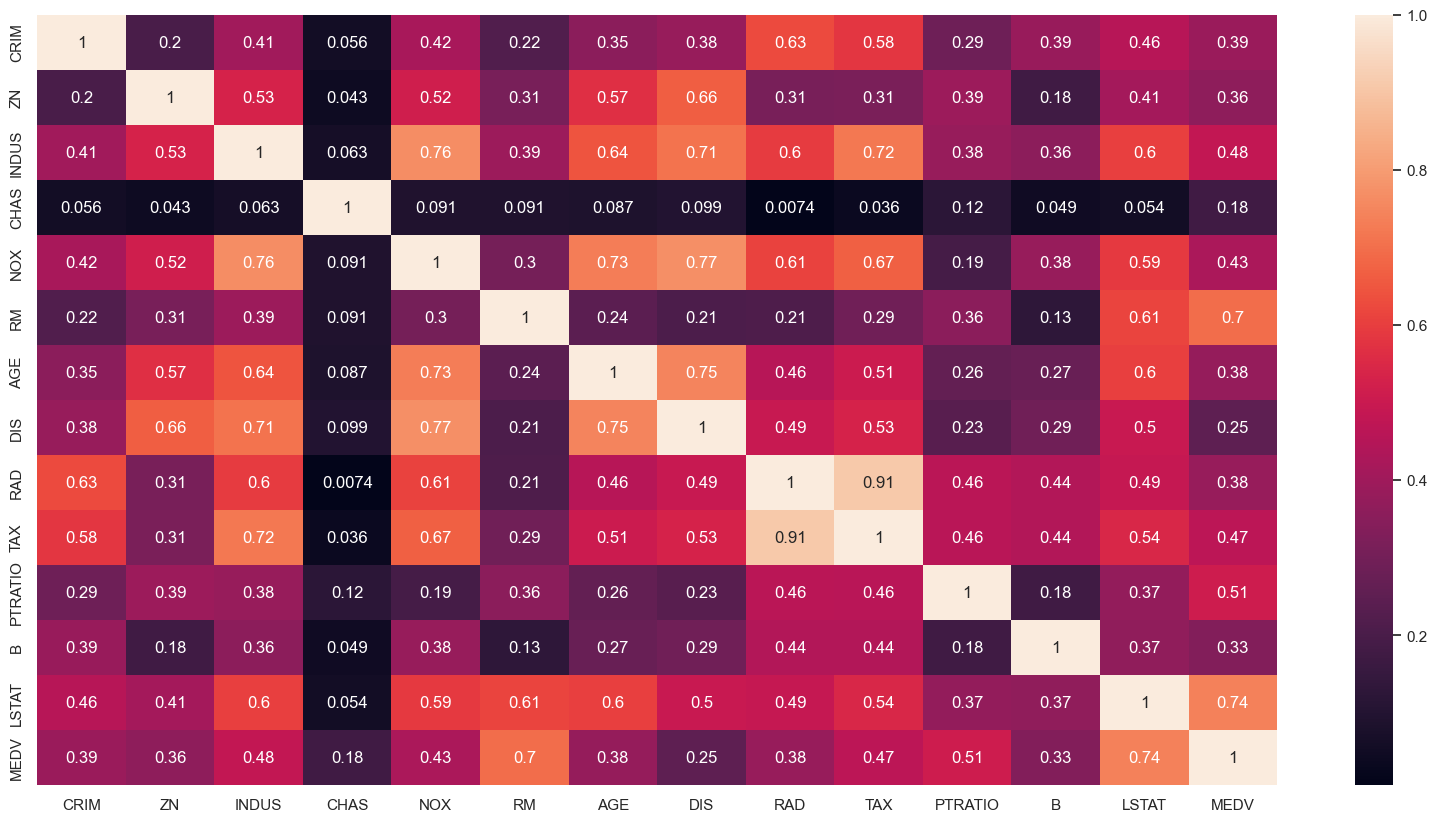

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors.

### We will use RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

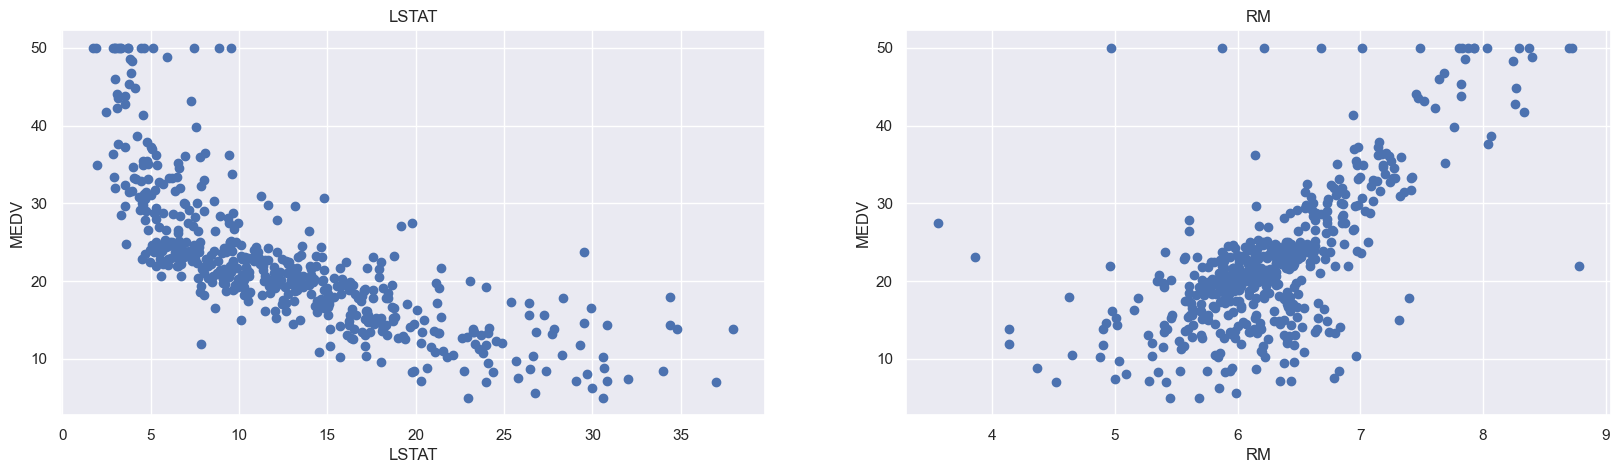

In [12]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

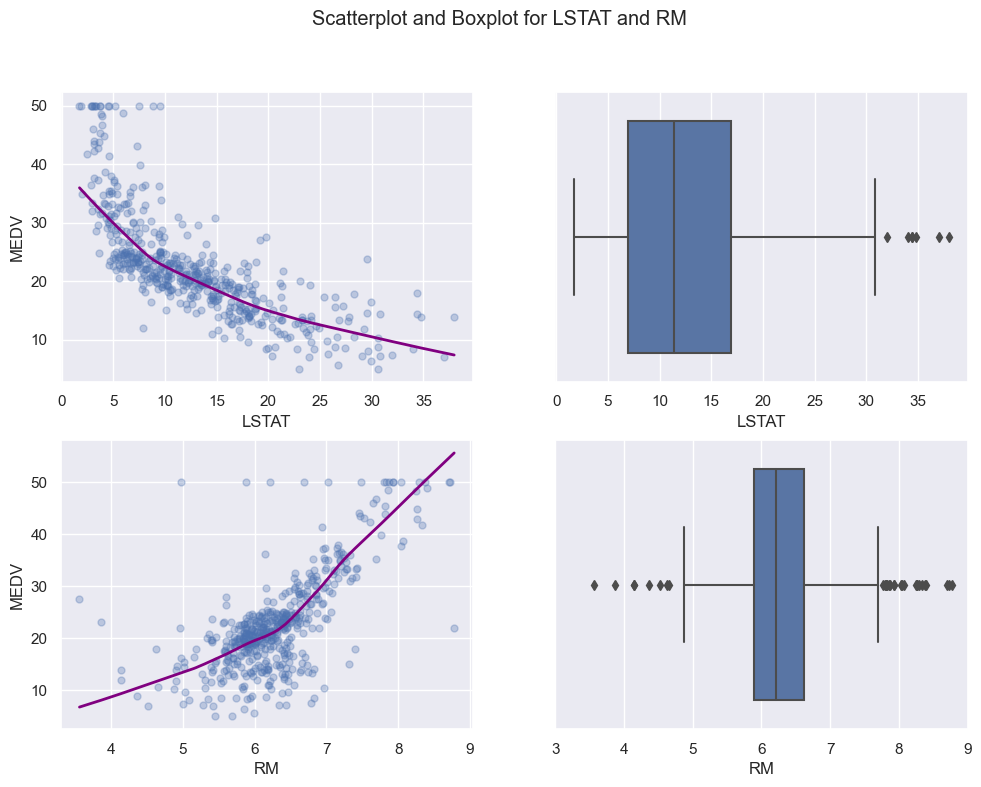

In [13]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Scatterplot and Boxplot for LSTAT and RM")

sns.regplot(x=df['LSTAT'], y=df['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[0, 0])

sns.boxplot(x=df['LSTAT'], ax=axes[0, 1])

sns.regplot(x=df['RM'], y=df['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[1, 0])

sns.boxplot(x=df['RM'], ax=axes[1, 1]).set(xlim=(3, 9))

plt.show()

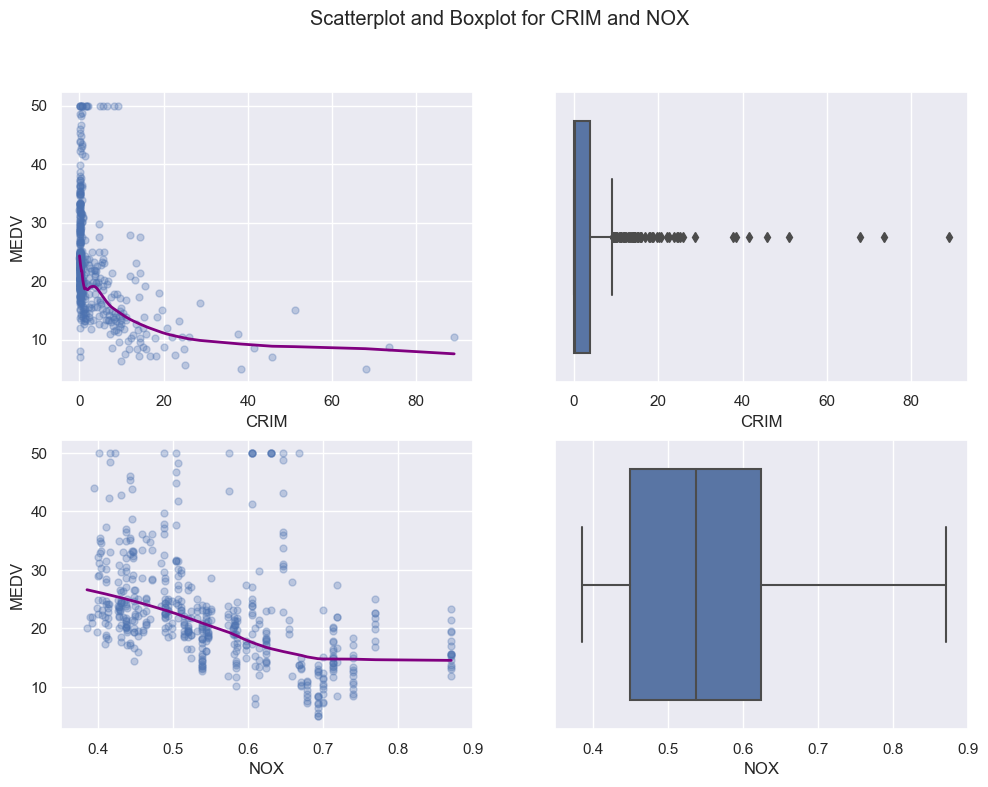

In [14]:
fig, axes = plt.subplots(2, 2)
fig.suptitle("Scatterplot and Boxplot for CRIM and NOX")

sns.regplot(x=df['CRIM'], y=df['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[0, 0])

sns.boxplot(x=df['CRIM'], ax=axes[0, 1])

sns.regplot(x=df['NOX'], y=df['MEDV'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[1, 0]).set(xlim=(0.35, 0.9))
            
sns.boxplot(x=df['NOX'], ax=axes[1, 1]).set(xlim=(0.35, 0.9))

plt.show()

<AxesSubplot:xlabel='RAD', ylabel='count'>

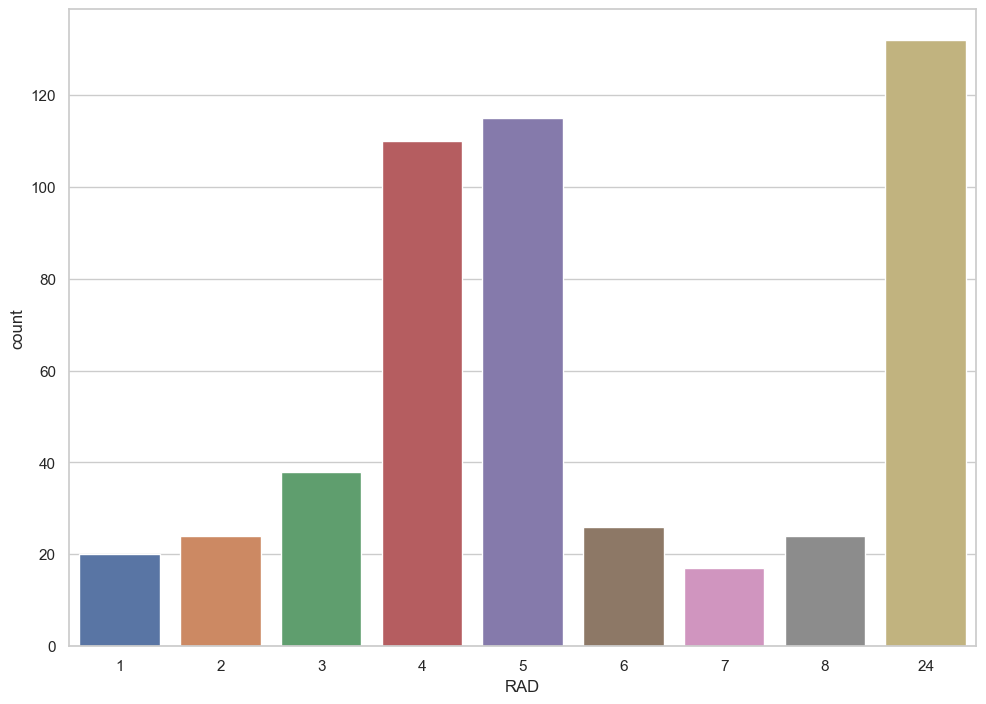

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='RAD',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

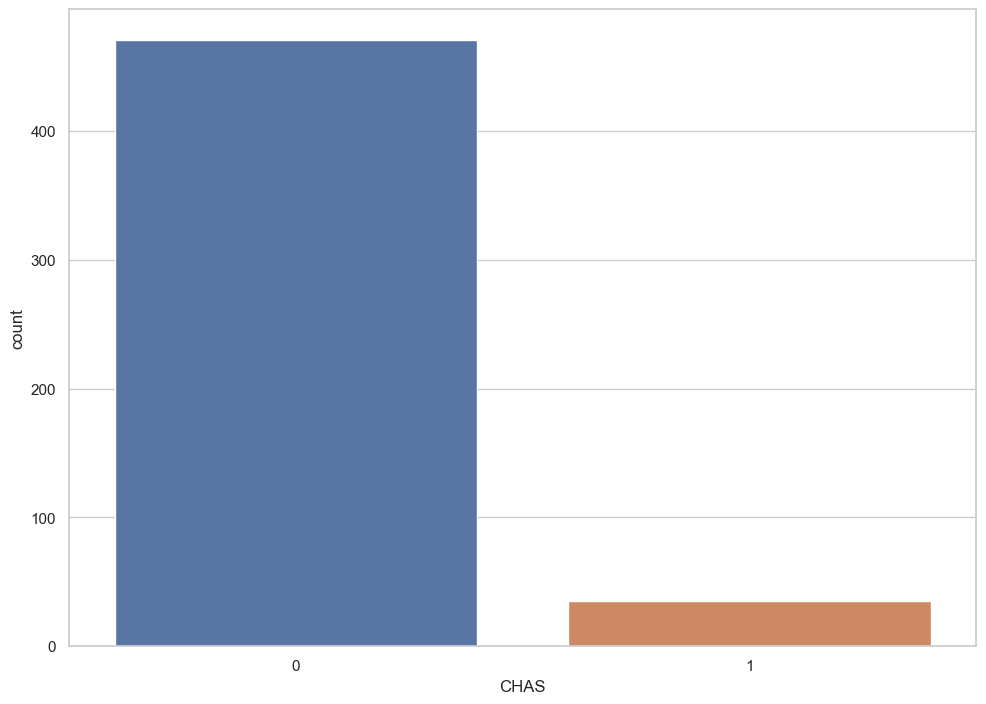

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

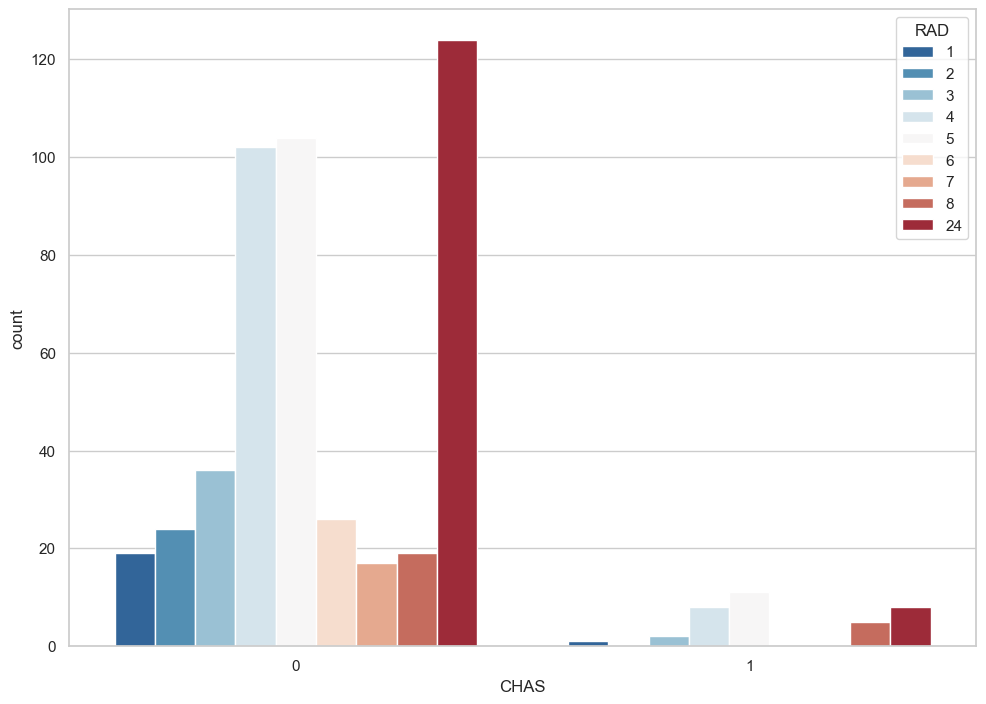

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=df,palette='RdBu_r')

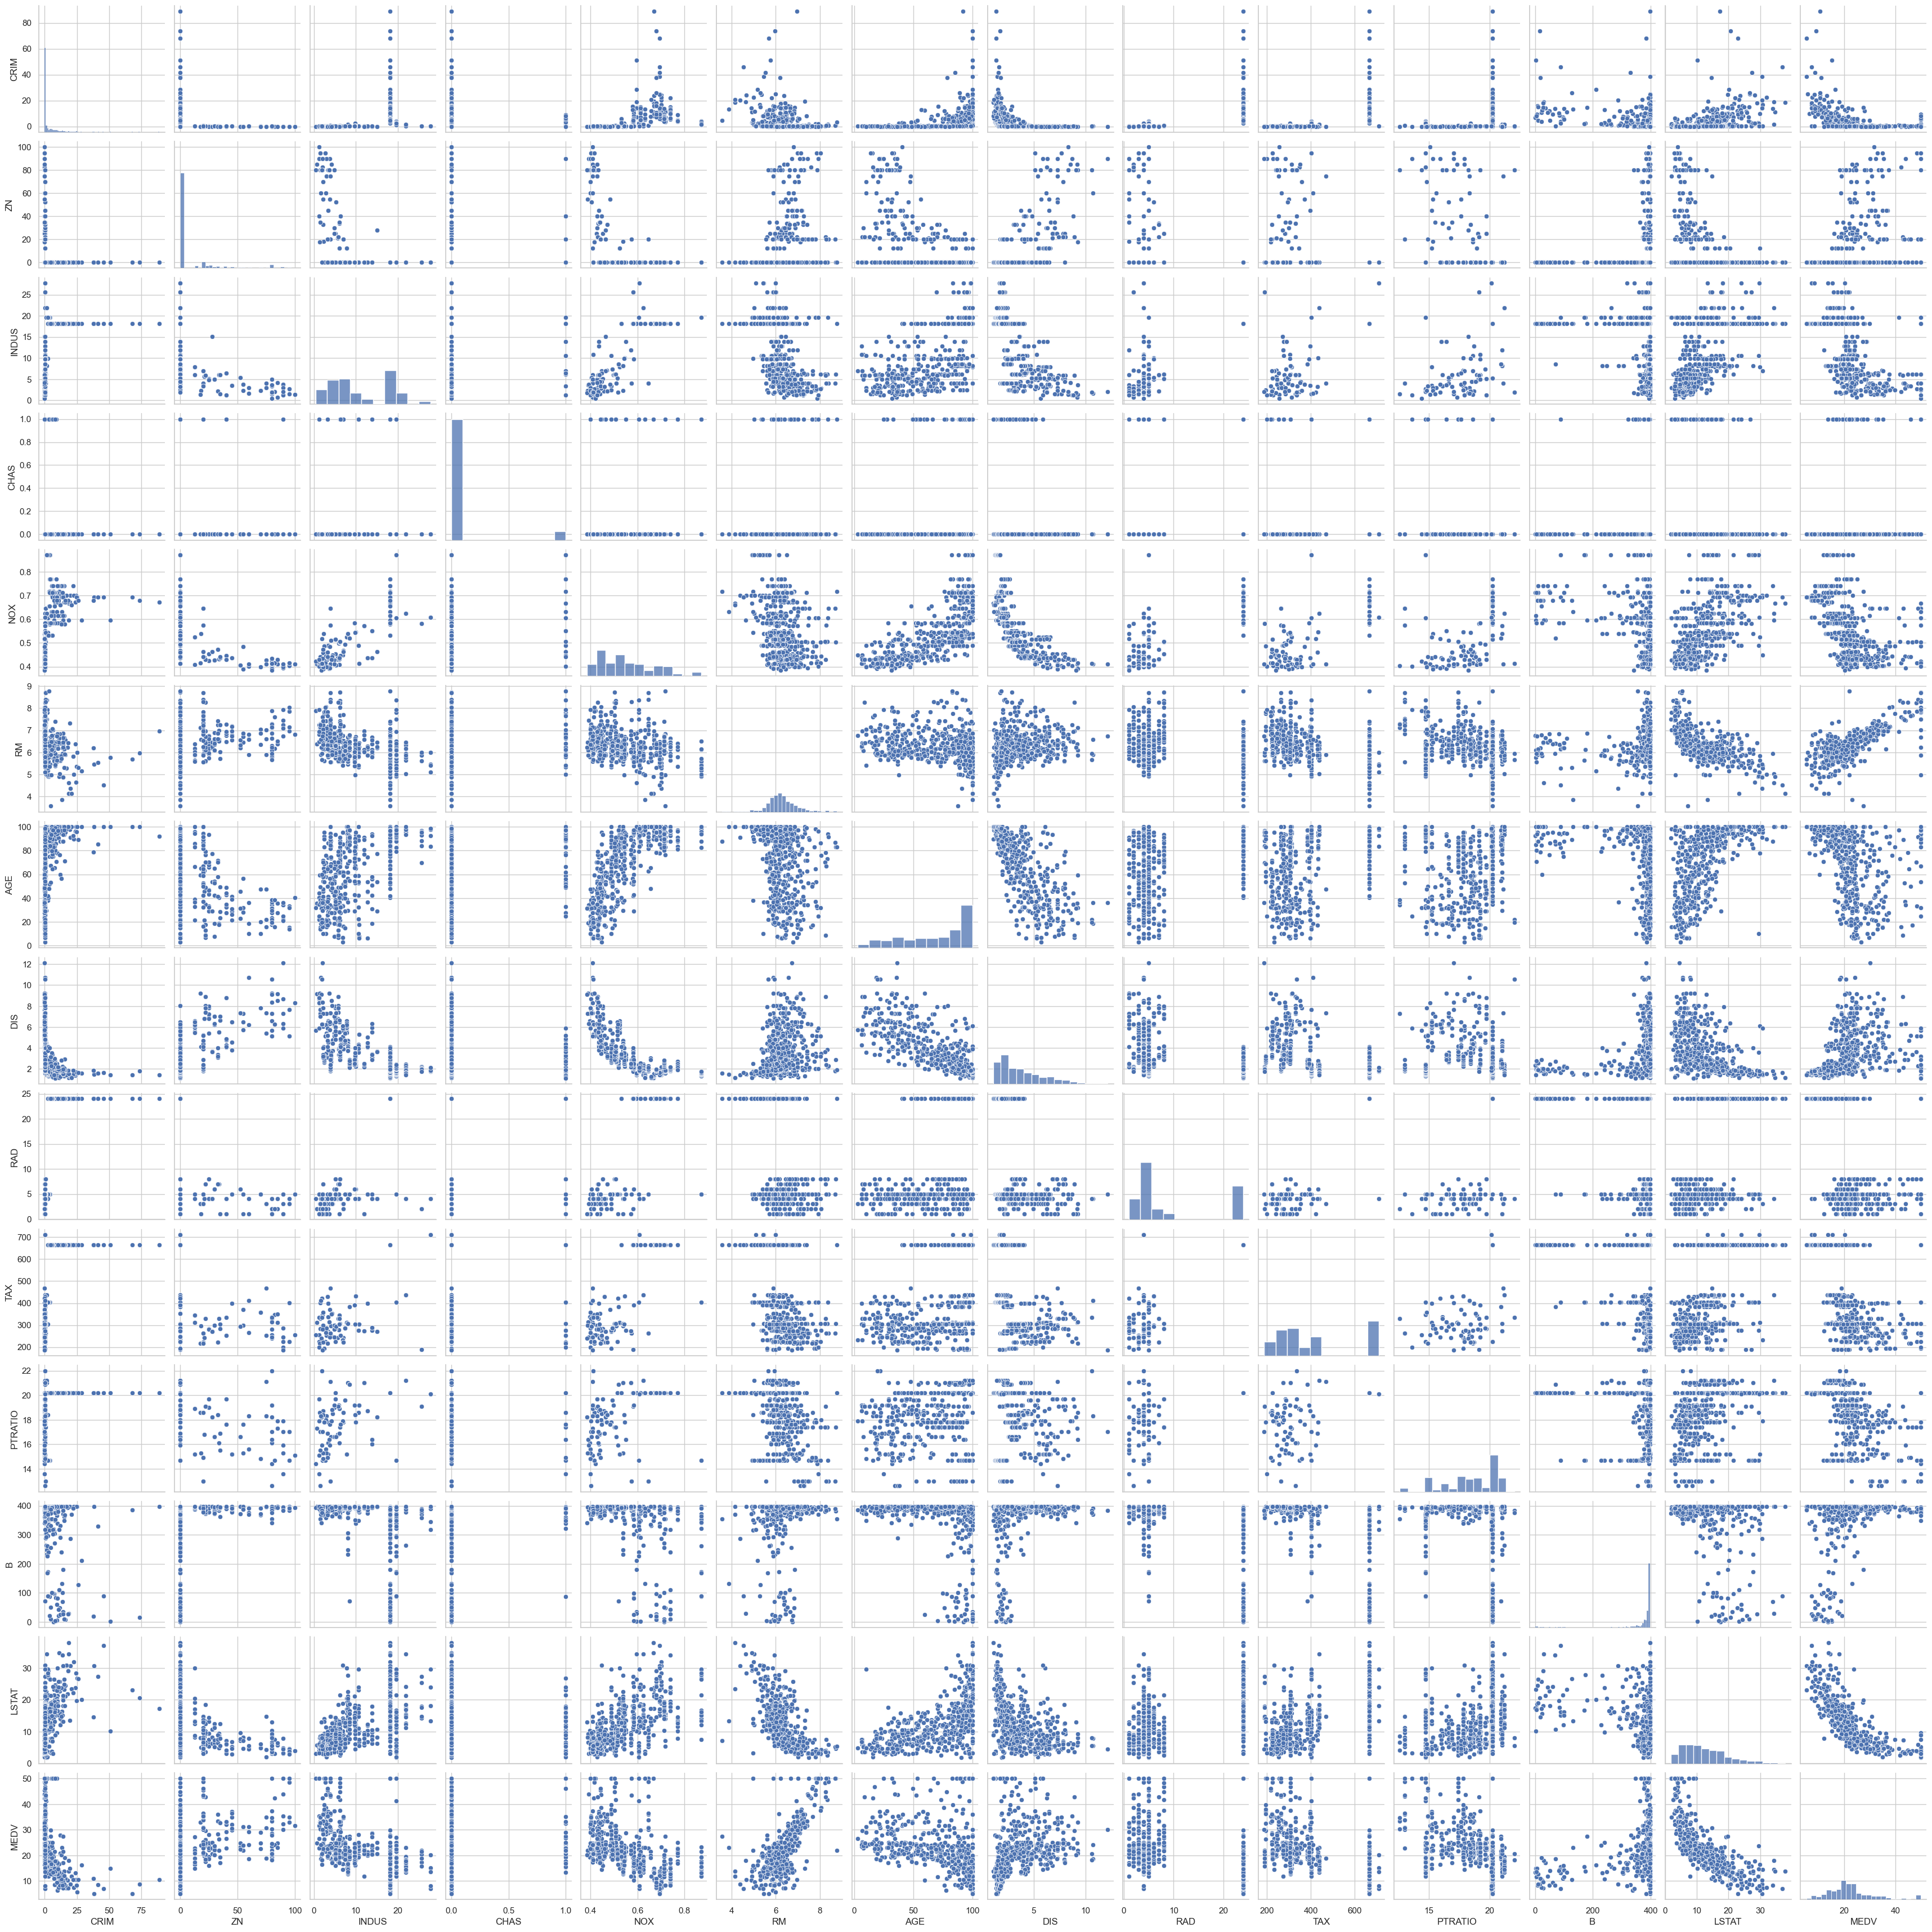

In [18]:
sns.pairplot(df)
plt.show()

### Spliting the data into train and test sets

In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
# Split the data into train and test sets

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]
X_test, y_test = X[split:], y[split:]

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


###  Defining  POLNOMIAL REGRESSION

In [24]:
def create_polynomial_features(X, degree):
    n_samples, n_features = np.shape(X)
    for d in range(2, degree+1):
        for i in range(n_features):
            X = np.concatenate((X, np.power(X[:, i:i+1], d)), axis=1)
    return X


In [25]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


#### Hyper Parameter Tuning - RandomSearch

In [26]:
def random_search(X, y, n_iter=100, degree_min=2, degree_max=5, alpha_min=0.0001, alpha_max=1.0):
    best_degree = None
    best_alpha = None
    best_mse = np.inf
    for i in range(n_iter):
        degree = np.random.randint(degree_min, degree_max+1)
        alpha = np.random.uniform(alpha_min, alpha_max)
        X_poly = create_polynomial_features(X, degree)
        X_train_poly = create_polynomial_features(X_train, degree)
        X_test_poly = create_polynomial_features(X_test, degree)
        theta = np.linalg.inv(X_train_poly.T.dot(X_train_poly) + alpha * np.identity(X_train_poly.shape[1])).dot(X_train_poly.T).dot(y_train)
        y_pred_train = X_train_poly.dot(theta)
        y_pred_test = X_test_poly.dot(theta)
        mse_train = mse(y_train, y_pred_train)
        mse_test = mse(y_test, y_pred_test)
        if mse_test < best_mse:
            best_degree = degree
            best_alpha = alpha
            best_mse = mse_test
        print(f'Iteration {i+1}/{n_iter}: degree={degree}, alpha={alpha:.4f}, MSE_train={mse_train:.4f}, MSE_test={mse_test:.4f}')
    return best_degree, best_alpha, best_mse


In [28]:
best_degree, best_alpha, best_mse = random_search(X, y)
print(f'Best degree: {best_degree}, Best alpha: {best_alpha:.4f}, Best MSE: {best_mse:.4f}')

Iteration 1/100: degree=5, alpha=0.7904, MSE_train=11.1691, MSE_test=54740.6370
Iteration 2/100: degree=4, alpha=0.4683, MSE_train=12.6166, MSE_test=1500.3370
Iteration 3/100: degree=3, alpha=0.4861, MSE_train=13.8234, MSE_test=26.5374
Iteration 4/100: degree=5, alpha=0.2769, MSE_train=10.6185, MSE_test=49604.1670
Iteration 5/100: degree=4, alpha=0.7770, MSE_train=12.7063, MSE_test=1573.8066
Iteration 6/100: degree=5, alpha=0.1305, MSE_train=10.2727, MSE_test=44325.8622
Iteration 7/100: degree=4, alpha=0.1414, MSE_train=12.4697, MSE_test=819.1454
Iteration 8/100: degree=3, alpha=0.2867, MSE_train=13.7050, MSE_test=19.9562
Iteration 9/100: degree=4, alpha=0.5628, MSE_train=12.6460, MSE_test=1541.6580
Iteration 10/100: degree=4, alpha=0.6917, MSE_train=12.6831, MSE_test=1567.9204
Iteration 11/100: degree=3, alpha=0.3624, MSE_train=13.7506, MSE_test=17.9167
Iteration 12/100: degree=4, alpha=0.1762, MSE_train=12.4949, MSE_test=988.7739
Iteration 13/100: degree=4, alpha=0.4251, MSE_train=12